In [25]:
"""
Template for week 4 project in Data Visualization

Solve the differential equations for Earth/Sun orbits using scipy
Plot the result orbits using matplotlib
"""

import math
import numpy as np

from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation

In [26]:
# Define some constants - units are in kilograms, kilometers, and days
GRAV_CON = 4.981 * 10 ** (-10) 
MASS_SUN = 1.989 * 10 ** 30
MASS_EARTH = 5.977 * 10 ** 24
INIT_EARTH = (1.495979 * 10 ** 8, 0, 0, 2.56721625 * 10 ** 6)
ORBITS = {}

# Resource paths
DATA_PATH = "data/"
PLOTS_PATH = "plots/"


In [27]:
#########################################################################
# Part 1 -  Solve the orbital equations and plot the resulting orbits


def orbital_eqs(e_0, t_0):
    """
    Input: Tuple e_0 of floats that represent Earth's position (p_x, p_y)
    and velocity (v_x, v_y) at time t_0
    
    Output: Tuple that contains approximation to d(e)/dt,
    computed from the orbital equations
    
    NOTE: The variable t_0 is not used in computing the
    returned value for the orbital equations
    """
    p_x, p_y, v_x, v_y = e_0
    dist_sun = np.sqrt(p_x**2 + p_y**2)
    
    a_x = -GRAV_CON * MASS_SUN * p_x / dist_sun**3
    a_y = -GRAV_CON * MASS_SUN * p_y / dist_sun**3
    
    return (v_x, v_y, a_x, a_y)

In [28]:
def solve_orbital_eqs(time_steps, speed=1.0):
    """
    Input: numpy array time_steps, optional float speed
    that scales the Earth's initial velocity
    
    Output: Returns a 2D numpy array whose rows are the
    x and y position of the Earth's orbit at specified times
    """
    
    initial = list(INIT_EARTH)
    initial[2] *= speed 
    initial[3] *= speed
    
    ans = odeint(orbital_eqs, initial, time_steps)
    
    return ans[:, :2].T

In [29]:
def test_solve_orbital_eqs():
    """ Test solve_orbital_eqs() """
    
    # Small test
    solve_orbital_eqs(np.linspace(0, 1, 3), 1.0)
    solve_orbital_eqs(np.linspace(0, 1, 11), 1.00)
    solve_orbital_eqs(np.linspace(0, 10, 101), 0.5)

    # Compute Earth/Sun orbits and save for later
    sim_steps = np.linspace(0, 1000, 1001)
    ORBITS["075"] = solve_orbital_eqs(sim_steps, 0.75)
    ORBITS["100"] = solve_orbital_eqs(sim_steps, 1.00)
    ORBITS["125"] = solve_orbital_eqs(sim_steps, 1.25)
    ORBITS["150"] = solve_orbital_eqs(sim_steps, 1.50)

test_solve_orbital_eqs()

In [30]:
def plot_earth_coords(orbit, time_steps, title="(p_x(t),p_y(t)) plots"):
    """
    Input: Numpy array orbit whose rows are numpy arrays containing x and y positions
    for the Earth orbit for specified times in the numpy array time_steps
    
    Action: Plot both x positions and y positions versus time_steps
    using matplotlib
    """
    
    fig, axs = plt.subplots(figsize=(8, 5))
    
    axs.plot(time_steps, orbit[0], label="x-coordinate (km)", color='blue')
    axs.plot(time_steps, orbit[1], label="y-coordinate (km)", color='green')

    axs.set_xlabel("Time (days)")
    axs.set_ylabel("Position (km)")
    axs.set_title(title)
    axs.legend()
    axs.grid()
    return fig

<IPython.core.display.Javascript object>


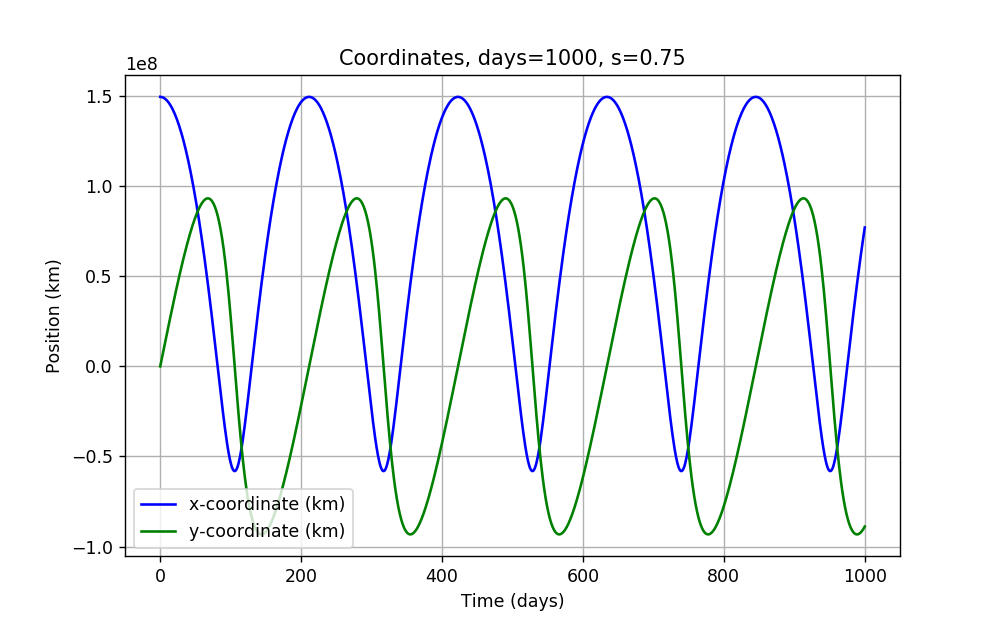

<IPython.core.display.Javascript object>


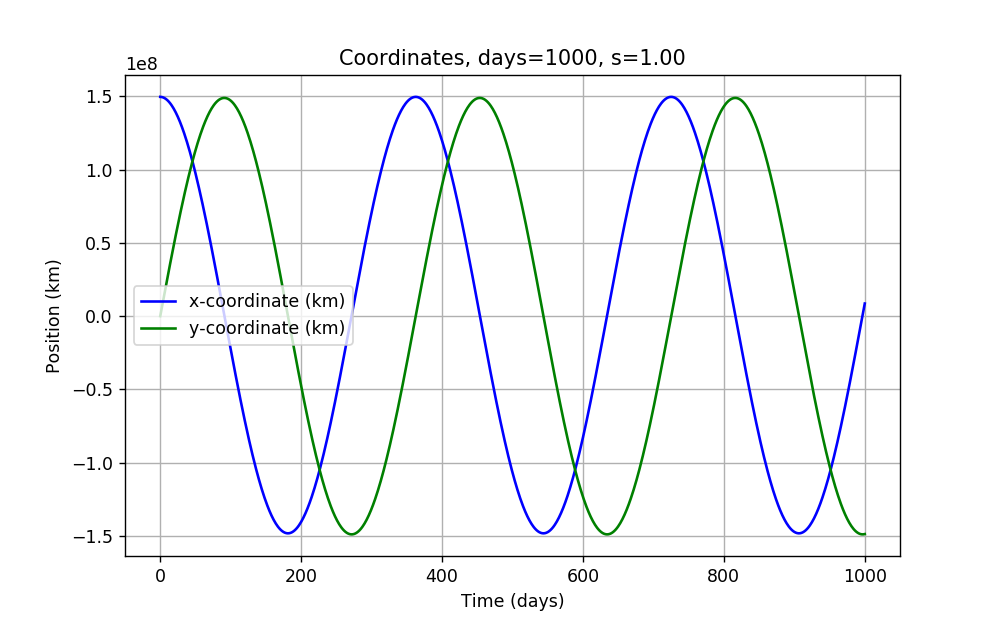

<IPython.core.display.Javascript object>


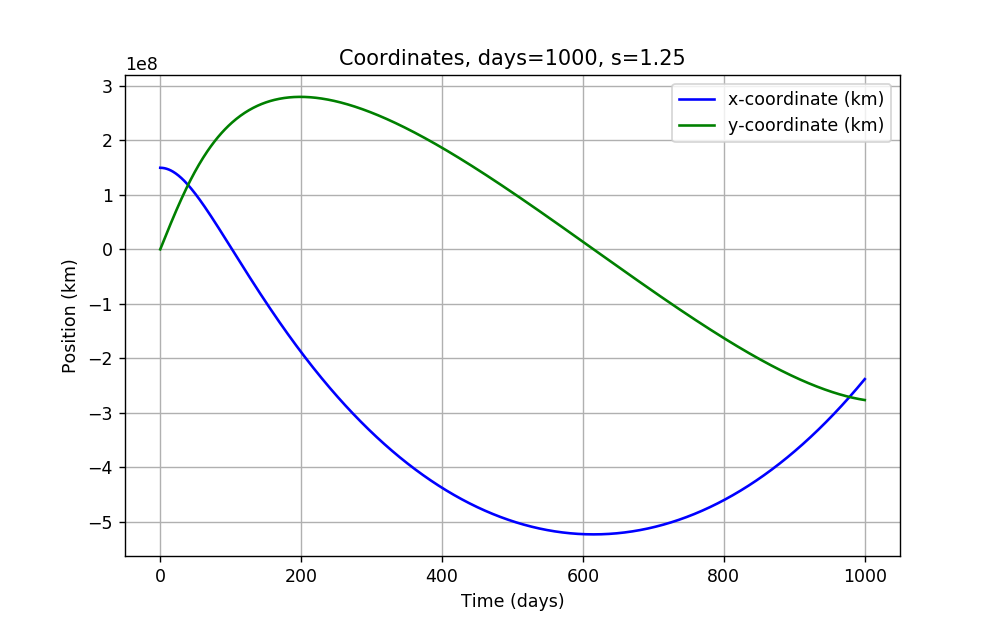

<IPython.core.display.Javascript object>


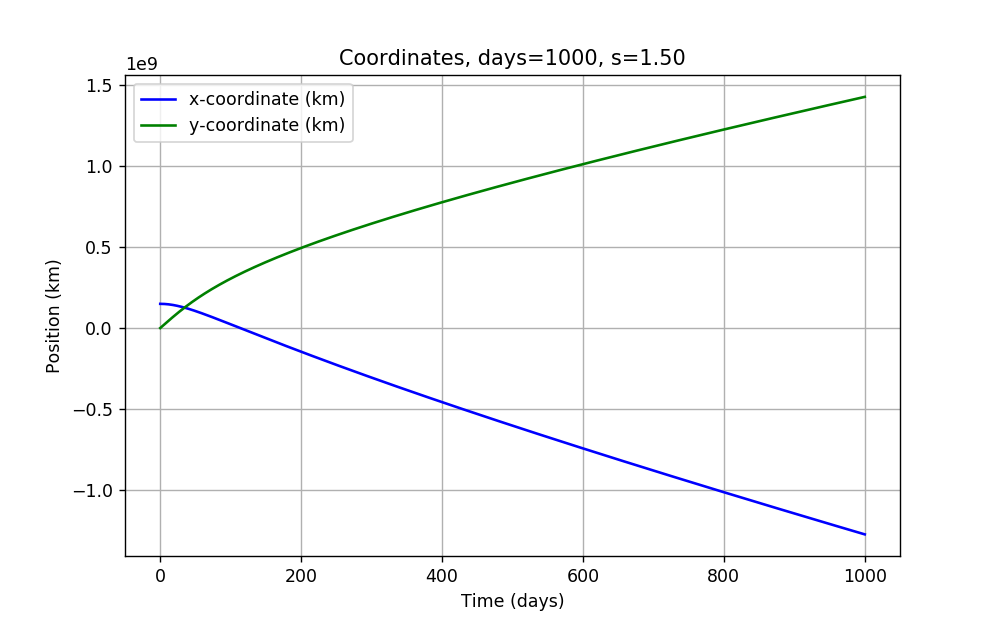

In [31]:
def test_plot_earth_coords():
    """ Test plot_earth_coords """
    
    sim_steps = np.linspace(0, 1000, 1001) 
    plot_earth_coords(ORBITS["075"], sim_steps, "Coordinates, days=1000, s=0.75")
    plot_earth_coords(ORBITS["100"], sim_steps, "Coordinates, days=1000, s=1.00")
    plot_earth_coords(ORBITS["125"], sim_steps, "Coordinates, days=1000, s=1.25")
    plot_earth_coords(ORBITS["150"], sim_steps, "Coordinates, days=1000, s=1.50")

test_plot_earth_coords()

In [32]:
def plot_earth_orbit(orbit, title="Plotted orbit"):
    """
    Input: Numpy array orbit whose rows are numpy arrays containing x and y positions
    for the Earth orbit
    
    Action: Plot x positions versus y positions using matplotlib
    """
    
    fig, axs = plt.subplots(figsize=(8, 8))
    
    axs.plot(orbit[0], orbit[1], label="Earth's Orbit", color='blue')
    axs.scatter(0, 0, color='yellow', marker='o', s=200, label="Sun")  

    axs.set_xlabel("x (km)")
    axs.set_ylabel("y (km)")
    axs.set_title(title)
    axs.legend()
    axs.grid()
    axs.set_aspect('equal')
    return fig

<IPython.core.display.Javascript object>


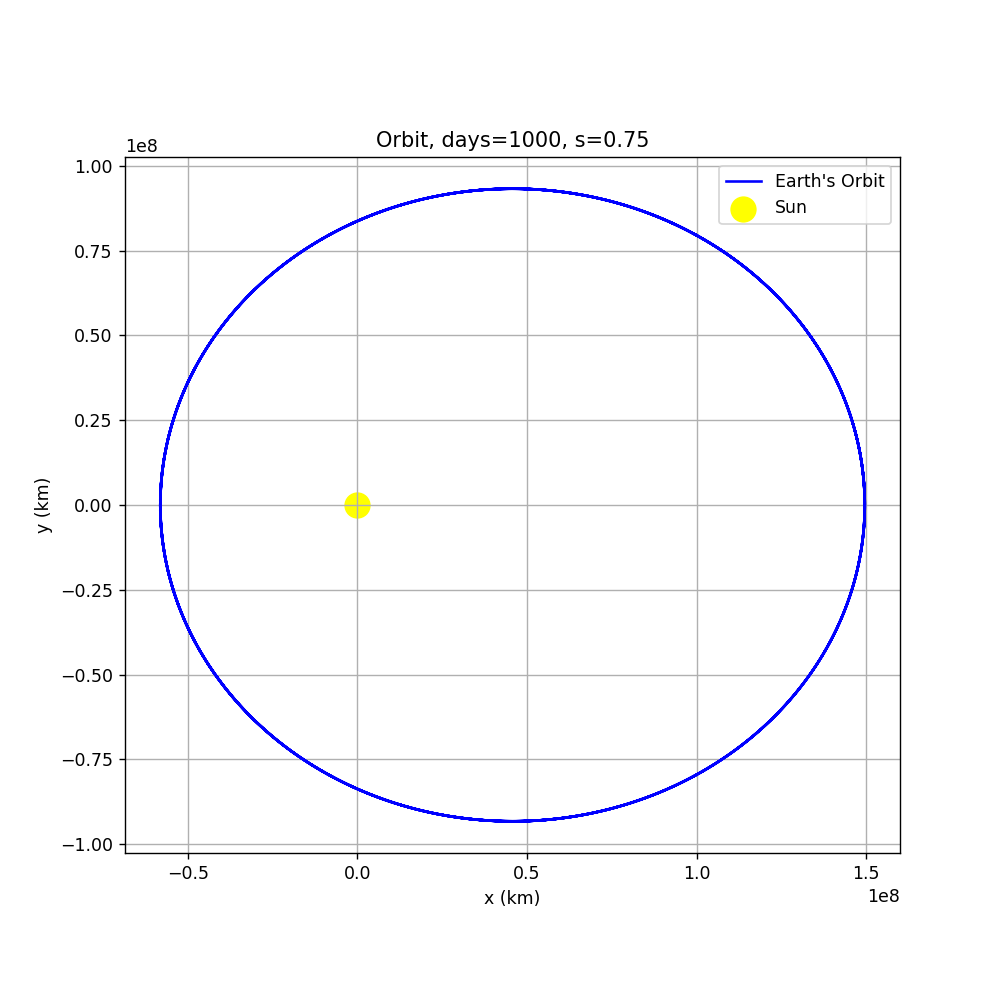

<IPython.core.display.Javascript object>


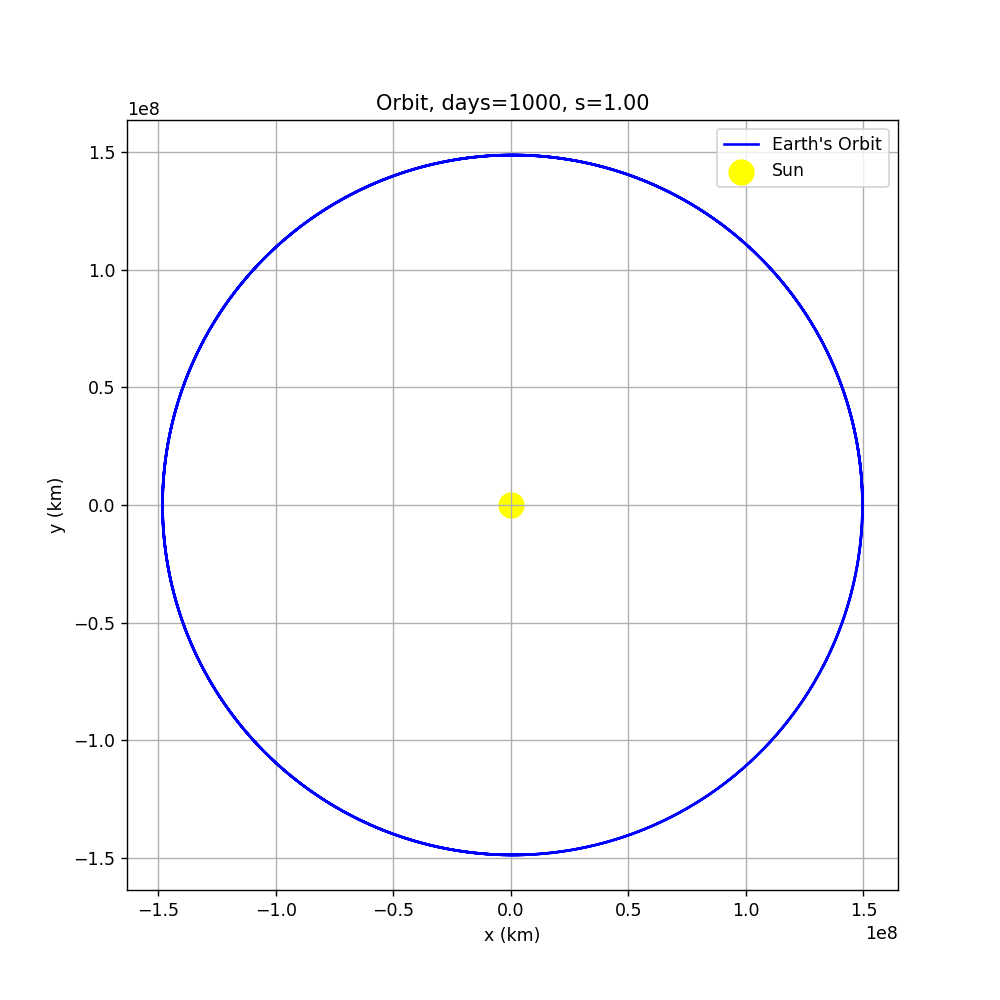

<IPython.core.display.Javascript object>


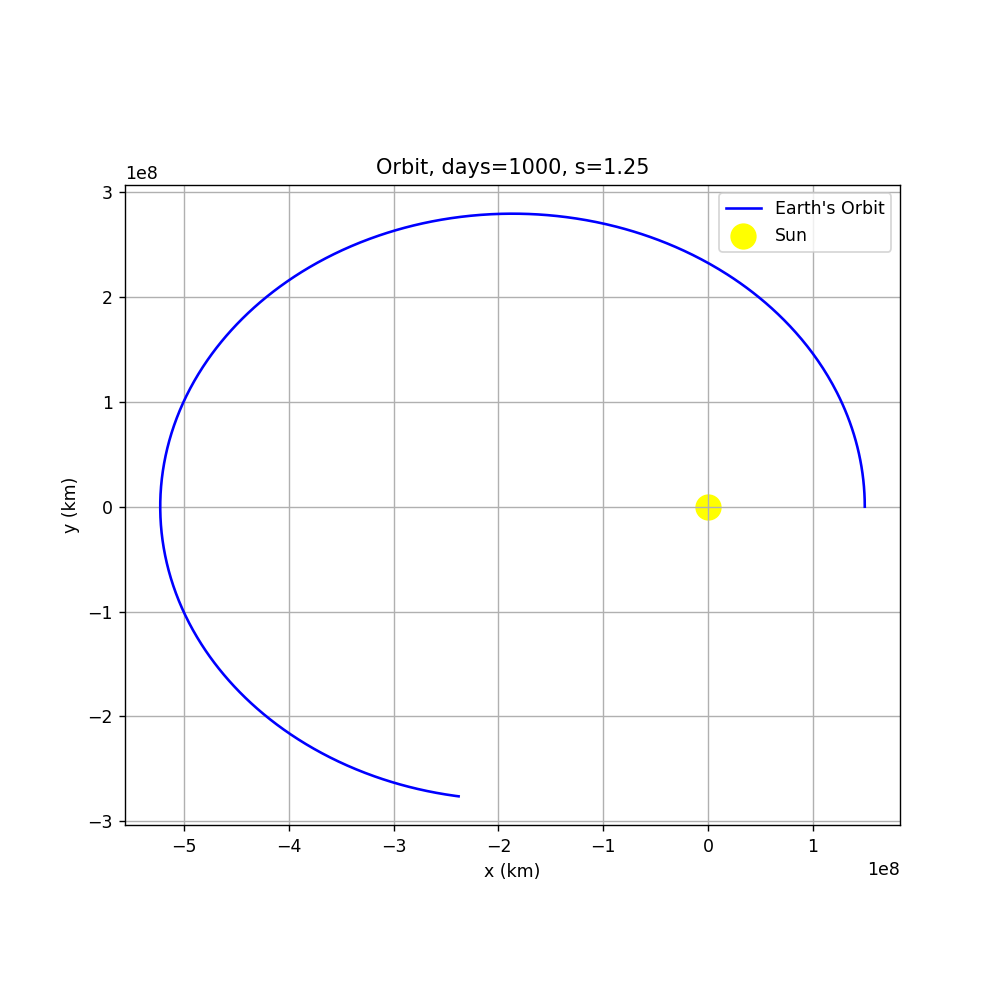

<IPython.core.display.Javascript object>


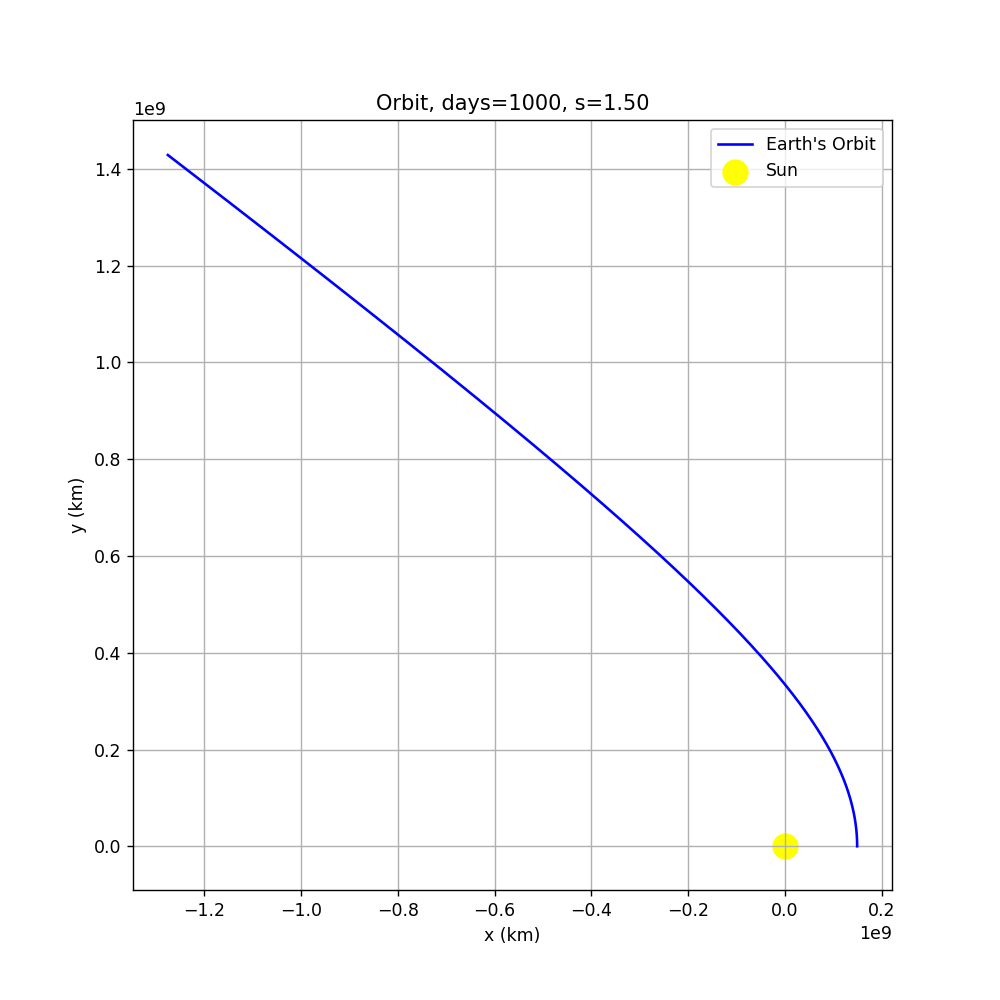

In [33]:
def test_plot_earth_orbit():
    """ Test plot_earth_orbit() """

    plot_earth_orbit(ORBITS["075"], "Orbit, days=1000, s=0.75")
    plot_earth_orbit(ORBITS["100"], "Orbit, days=1000, s=1.00")
    plot_earth_orbit(ORBITS["125"], "Orbit, days=1000, s=1.25")
    plot_earth_orbit(ORBITS["150"], "Orbit, days=1000, s=1.50")

test_plot_earth_orbit()

In [34]:
#########################################################################
# Part 2 - Animate the computed orbits


def extend_limits(limits, pad=0.1):
    """
    Input: Tuple limits = (min_x, max_x, min_y, max_y),
    float pad treated as a percentage

    Output: Tuple of four floats that represent new ranges
    extended by pad (as percentage of range length) in both directions
    """
    min_x, max_x, min_y, max_y = limits

    range_x = max_x - min_x
    range_y = max_y - min_y

    extend_x = range_x * pad
    extend_y = range_y * pad

    return (min_x - extend_x, max_x + extend_x, min_y - extend_y, max_y + extend_y)

In [23]:
def animate_earth_orbit(orbit, title="Animated orbit"):
    """
    Input: Numpy array orbit whose rows are numpy arrays containing x and y positions
    for the Earth orbit
    
    Output: matplotlib Animation object corresponding to
    plot of x positions versus y positions using matplotlib
    """

    fig, axs = plt.subplots(figsize=(5, 5))

    x_min, x_max = min(orbit[0]), max(orbit[0])
    y_min, y_max = min(orbit[1]), max(orbit[1])
    extended_limits = extend_limits((x_min, x_max, y_min, y_max), pad=0.1)

    axs.set_xlim(extended_limits[:2])  
    axs.set_ylim(extended_limits[2:])  
    
    axs.set_xlabel("x (km)")
    axs.set_ylabel("y (km)")
    axs.set_title(title)
    
    axs.scatter(0, 0, color='yellow', marker='o', s=200, label="Sun") 

    earth, = axs.plot([], [], 'bo', markersize=8, label="Earth")  
    orbit_line, = axs.plot([], [], 'b', alpha=0.5)  

    def update(frame):
        earth.set_data(orbit[0][frame], orbit[1][frame])
        orbit_line.set_data(orbit[0][:frame], orbit[1][:frame])  
        return earth, orbit_line

    ani = animation.FuncAnimation(fig, update, frames=len(orbit[0]), interval=20, blit=True)

    return ani

Creating animation for speed=0.75


<IPython.core.display.Javascript object>


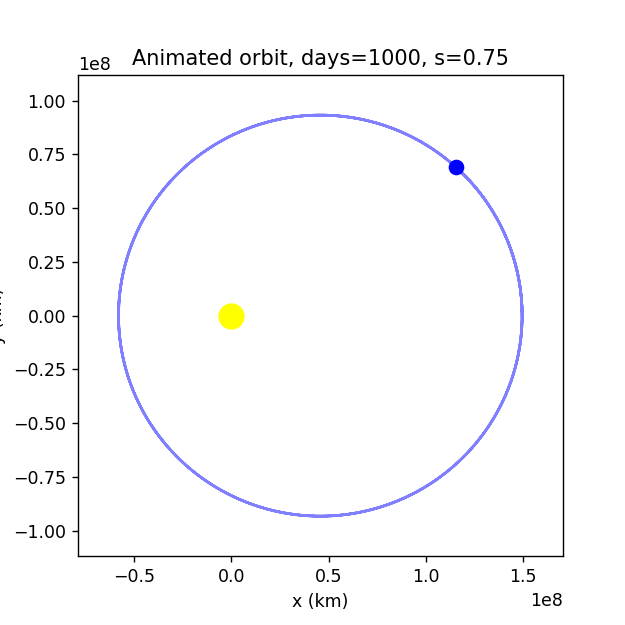

Creating animation for speed=1.00


<IPython.core.display.Javascript object>


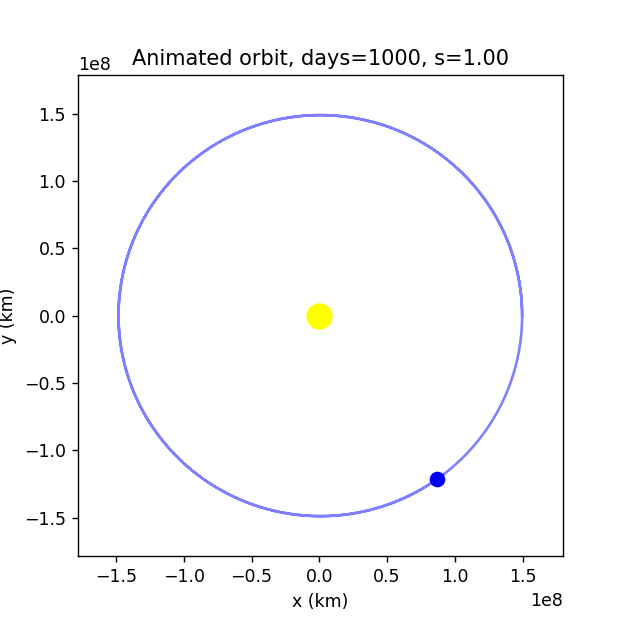

Creating animation for speed=1.25


<IPython.core.display.Javascript object>


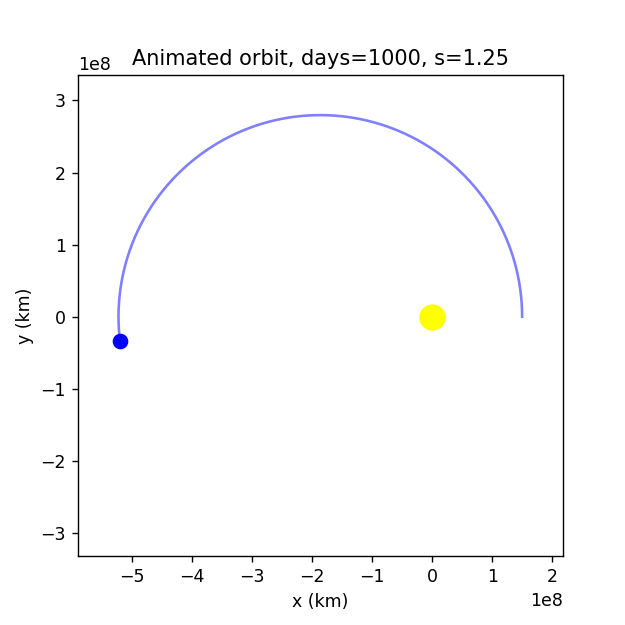

Creating animation for speed=1.50


<IPython.core.display.Javascript object>


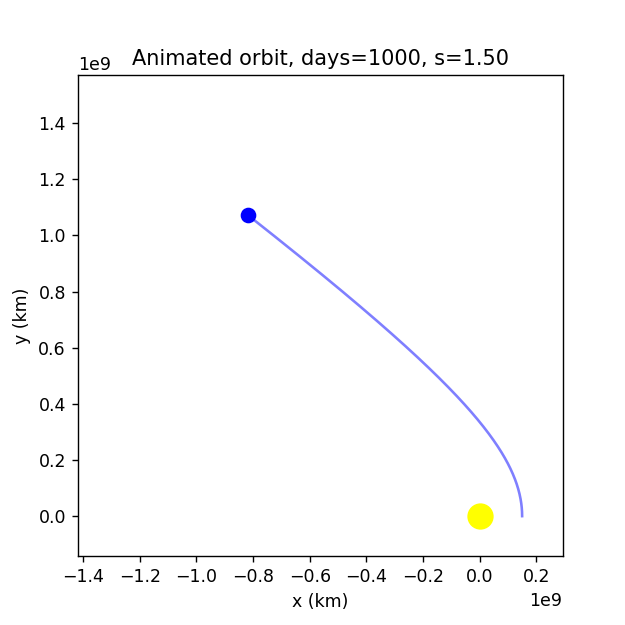

Done


In [24]:
def test_animate_earth_orbit():
    """ Test animate_earth_orbit() """
    
    print("Creating animation for speed=0.75")
    handle1 = animate_earth_orbit(ORBITS["075"], "Animated orbit, days=1000, s=0.75")
    
    print("Creating animation for speed=1.00")
    handle2 = animate_earth_orbit(ORBITS["100"], "Animated orbit, days=1000, s=1.00")
    
    print("Creating animation for speed=1.25")
    handle3 = animate_earth_orbit(ORBITS["125"], "Animated orbit, days=1000, s=1.25")
    
    print("Creating animation for speed=1.50")
    handle4 = animate_earth_orbit(ORBITS["150"], "Animated orbit, days=1000, s=1.50")
    print("Done")
        
    return handle1, handle2, handle3, handle4

%matplotlib notebook
# Save handles to animation objects so they are not garbage collected
HANDLES = test_animate_earth_orbit()

## Question 1##
**What are the geometric shapes of the various orbits computed by your simulations?**

Insert answer here.

## Question 2##
**What happened to the earth's trajectory when we increased its initial velocity by 50%?**

Insert answer here.